### Import libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import math

### Read data

In [23]:
df = pd.read_excel('LatarnikWyborczy2023.xlsx')
df.set_index('Komitet', inplace=True)
df.head(10)

,Pyt1,Pyt2,Pyt3,Pyt4,Pyt5,Pyt6,Pyt7,Pyt8,Pyt9,Pyt10,Pyt11,Pyt12,Pyt13,Pyt14,Pyt15,Pyt16,Pyt17,Pyt18,Pyt19,Pyt20
Komitet,,,,,,,,,,,,,,,,,,,,
Trzecia Droga,1,-1,1,1,1,1,-1,0,1,-1,-1,-1,1,1,1,1,1,1,1,1
PIS,1,1,0,1,-1,1,0,1,-1,-1,0,-1,-1,1,-1,-1,1,1,-1,0
Konfederacja,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,1,-1,1,1,1,1
Polska Jest Jedna,1,-1,1,1,-1,1,-1,1,-1,-1,1,-1,1,1,1,-1,1,1,1,1
Bezpartyjni,1,-1,1,1,1,1,-1,1,1,-1,1,-1,1,1,1,-1,-1,-1,1,-1
Lewica,-1,1,1,1,1,1,1,1,1,-1,-1,1,1,-1,1,1,1,-1,1,1
KO,-1,1,1,1,1,1,-1,1,1,1,-1,-1,1,1,1,1,1,-1,1,1


In [25]:
answers = df.values
answers

array([[ 1, -1,  1,  1,  1,  1, -1,  0,  1, -1, -1, -1,  1,  1,  1,  1,
         1,  1,  1,  1],
       [ 1,  1,  0,  1, -1,  1,  0,  1, -1, -1,  0, -1, -1,  1, -1, -1,
         1,  1, -1,  0],
       [ 1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,
         1,  1,  1,  1],
       [ 1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,
         1,  1,  1,  1],
       [ 1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
        -1, -1,  1, -1],
       [-1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
         1, -1,  1,  1],
       [-1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
         1, -1,  1,  1]])

### Fit PCA(2)

In [11]:
pca = PCA(n_components=2)

In [14]:
principal_components = pca.fit_transform(answers)

In [15]:
principal_components_df = pd.DataFrame(
                            data = principal_components, 
                            columns = ['principal component 1', 'principal component 2']
                                      )

In [26]:
principal_components_df.index = df.index
principal_components_df.head(10)

,principal component 1,principal component 2
Komitet,,
Trzecia Droga,0.376507,0.907634
PIS,-2.209635,-2.684217
Konfederacja,-2.215088,3.413467
Polska Jest Jedna,-1.945733,-0.845309
Bezpartyjni,-0.098369,-0.896092
Lewica,3.623493,-0.608548
KO,2.468825,0.713066


### Distance

In [43]:
results = pd.DataFrame(np.nan, index = principal_components_df.index, columns = principal_components_df.index)
results.head(50)

Komitet,Trzecia Droga,PIS,Konfederacja,Polska Jest Jedna,Bezpartyjni,Lewica,KO
Komitet,,,,,,,
Trzecia Droga,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Konfederacja,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polska Jest Jedna,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bezpartyjni,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lewica,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KO,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
for no_r, row in enumerate(principal_components_df.itertuples()):
    
    name_r, *p = row
    
    for column in principal_components_df.itertuples():
        
        name_c, *q = column
        
        if name_r == name_c:
            
            continue
        
        else:
            
            results.loc[name_r, name_c] = math.dist(p, q)

In [47]:
results.head(50)

Komitet,Trzecia Droga,PIS,Konfederacja,Polska Jest Jedna,Bezpartyjni,Lewica,KO
Komitet,,,,,,,
Trzecia Droga,NaN,4.426005,3.604935,2.909572,1.865191,3.583536,2.101346
PIS,4.426005,NaN,6.097686,1.857747,2.766736,6.191428,5.781826
Konfederacja,3.604935,6.097686,NaN,4.267286,4.801333,7.089826,5.406589
Polska Jest Jedna,2.909572,1.857747,4.267286,NaN,1.848062,5.574256,4.681544
Bezpartyjni,1.865191,2.766736,4.801333,1.848062,NaN,3.732953,3.029831
Lewica,3.583536,6.191428,7.089826,5.574256,3.732953,NaN,1.754971
KO,2.101346,5.781826,5.406589,4.681544,3.029831,1.754971,NaN


### Find similar parties and non-similar parties

In [52]:
results.idxmin()

Komitet
Trzecia Droga              Bezpartyjni
PIS                  Polska Jest Jedna
Konfederacja             Trzecia Droga
Polska Jest Jedna          Bezpartyjni
Bezpartyjni          Polska Jest Jedna
Lewica                              KO
KO                              Lewica
dtype: object

In [53]:
results.idxmax()

Komitet
Trzecia Droga                 PIS
PIS                        Lewica
Konfederacja               Lewica
Polska Jest Jedna          Lewica
Bezpartyjni          Konfederacja
Lewica               Konfederacja
KO                            PIS
dtype: object

### Visualise

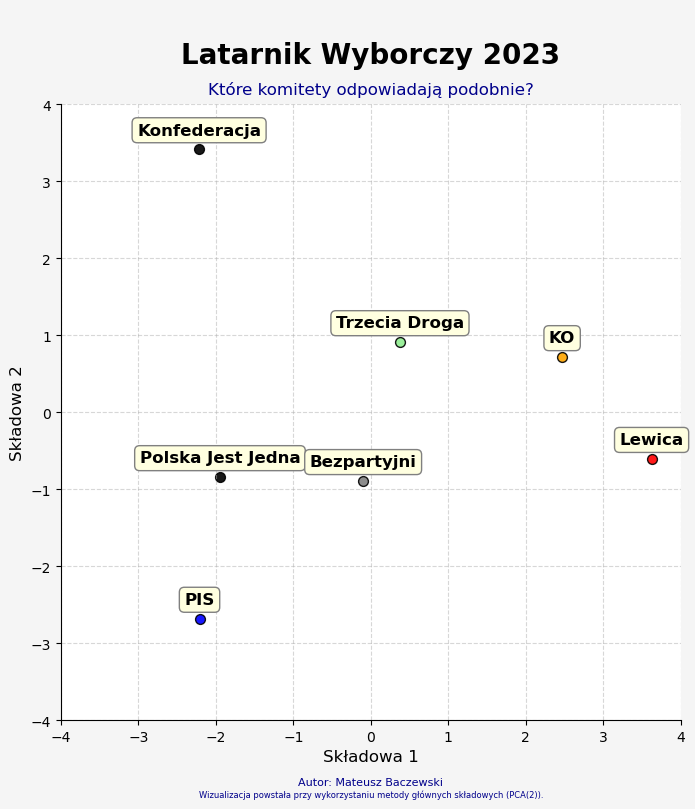

In [48]:
color_dict = {
    'Konfederacja': "black", 
    'Trzecia Droga': "lightgreen", 
    'Lewica': "red", 
    'KO': "orange", 
    'PIS': "blue",
    'Bezpartyjni': "gray",
    'Polska jest jedna': "lightblue"
}

fig = plt.figure(figsize=(8, 8), facecolor='whitesmoke')
ax = fig.add_subplot() 
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_xlabel('Składowa 1', fontsize=12)
ax.set_ylabel('Składowa 2', fontsize=12)
ax.set_title('\nLatarnik Wyborczy 2023\n', fontsize=20, fontweight='bold')


for row in principal_components_df.itertuples():
    
    name, x, y = row
    color = color_dict.get(name, "black")
    ax.scatter(x, y, c=color, s=50, edgecolor='black', linewidth=1, alpha=0.9)

    # Add party name labels with a shadow effect
    ax.text(x, y + 0.25, name, fontsize=12, ha='center', va='center', 
        bbox=dict(boxstyle='round,pad=0.3', 
                  edgecolor='gray', 
                  facecolor='lightyellow'),
                  color='black', 
                  fontweight='bold')


ax.grid(True, linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text(0.5, 1.025, "Które komitety odpowiadają podobnie?", fontsize=12, ha='center', va='center', transform=ax.transAxes, color='darkblue')
ax.text(0.5, -0.1, "Autor: Mateusz Baczewski", fontsize=8, ha='center', va='center', transform=ax.transAxes, color='darkblue')
ax.text(0.5, -0.12, "Wizualizacja powstała przy wykorzystaniu metody głównych składowych (PCA(2)).", fontsize=6, ha='center', va='center', transform=ax.transAxes, color='darkblue')

plt.show()